# Lab 8

K-means Clustering

[The RGB color model](https://en.wikipedia.org/wiki/RGB_color_model) is an additive color model in which the red, green, and blue primary colors of light are added together in various ways to reproduce a broad array of colors. The name of the model comes from the initials of the three additive primary colors, red, green, and blue.

There are plenty of RBG-to-color converters on the web 
https://www.rapidtables.com/convert/color/rgb-to-hex.html

These two RGB triples look almost identical to the human eye
- [0, 0, 255]
- [0, 1, 255]

However there is no "reverse lookup" that tells you that "this color is close to blue" unless it is a [basic](https://en.wikipedia.org/wiki/Web_colors#Basic_colors) or [extended](https://en.wikipedia.org/wiki/Web_colors#Extended_colors) color with a specified RGB value.

For this assignment you are provided a file with RGB triples for a bunch of colors.

The task is to use K-means clustering to:

- group the colors into color families
- make a histogram of your color clusters to see the dsitribution of colors
- establish some human-readable names for your clusters like red, blue, yellow, etc.
- determine the centroids of the clusters
- write a function that makes the best guess of an RGB triple based on the centroids
- make some visual output to show that your guesses worked

In [1]:
## import necessary libraries and packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot as plt, patches
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans

---
## Load Data

This color data was taken from a selection of digital ad images where the goal of the project was to understand if the presence of certain colors were indicative of high performing ads.

However, before making a predictive model, it was necessary to actually classify the color of RBG triples that were present in the images.

It is important to note that if the color values were uniformly distributed there would be no value in clustering.


In [2]:
url = "https://drive.google.com/file/d/1D-WVx8-CL4a1X4Gvt5MfaS7CLSHzCYa3/view?usp=sharing"
url = 'https://drive.google.com/uc?id=' + url.split('/')[-2]
df_colors = pd.read_csv(url)

---
## Examine data

If our thesis is correct, similar colors should be near each other in the 3-dimensional RBG space.

To visualize this we can plot the RBG components and verify that this is the case.

Note that in the plot below, the full RGB triple is used to tell pandas/matplotlib what color to make each dot.

In [3]:
# how many data points?
len(df_colors)

2030

In [4]:
# what is in our DataFrame?
df_colors.head()

,red,green,blue
0,233,197,146
1,183,97,58
2,188,84,7
3,247,252,254
4,248,253,253


C:\Users\slee003\AppData\Local\Temp/ipykernel_9972/3946519600.py:4: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  fig = plt.figure().gca(projection='3d')


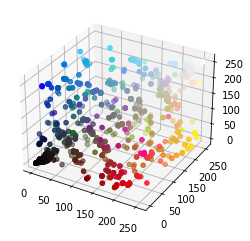

In [5]:
# make a 3d scatter plot
colors = np.array(df_colors.values)/256     # colors need to be (r,b,g) tuple in the range of 0-1

fig = plt.figure().gca(projection='3d')
fig.scatter(df_colors.red, df_colors.green, df_colors.blue, color=colors )

---
### Exercise 1: Construct K-means model (4 points)

Fit a KMeans model with 10 clusters.  Be sure to use a fixed `random_state` so that you get consistent results.

Use the `predict` function to get the cluster predictions for each data point and add this to the `df_colors` DataFrame 

##### Student Solution

In [6]:
n_clusters = 10
random_state = 10  # makes sure you get the same results each time

## get np array for RBG values
X = np.array(df_colors.values)


# Define a function
def fit_kmeans(X, n_clusters, random_state):
    
  km = KMeans(n_clusters=n_clusters,
           #init='random',
           init='k-means++',   # Place the initial centroids far away from each other 
           n_init=10,          # Run the k_means algo 10 times(with different random centroids)
           max_iter=300,       # Maximum number of iterations for each run 
           tol=1e-04,          # Controls the tolerance w.r.t. changes in within-cluster SSE to declare convergence
           random_state=random_state)  

  model = km.fit(X)
    
  return model


# Use the function above to cluster the RGB values in X
model = fit_kmeans(X, n_clusters, random_state)


## get cluster prediction and add to DataFrame
df_colors['cluster'] = model.predict(X)
df_colors


,red,green,blue,cluster
0,233,197,146,6
1,183,97,58,3
2,188,84,7,3
3,247,252,254,2
4,248,253,253,2
...,...,...,...,...
2025,27,123,141,9
2026,194,193,198,6
2027,41,113,197,9
2028,35,114,197,9


## Visualize results for K-means clustering


---
### Exercise 2: Plot a histogram of the distribution of clusters (4 points)

Since there are 10 clusters, using the `pandas.DataFrame.hist()` will render the correct distribution of values across each bin since 10 is the default number of bins.

Make sure that your visual output also matches the output of `Series.value_counts()`


##### Student Solution

array([[<AxesSubplot:title={'center':'cluster'}>]], dtype=object)

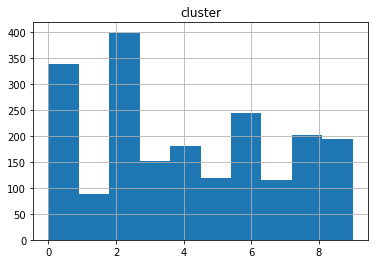

In [7]:
## plot histogram and print out number of points in each color cluster

df_colors.hist(column='cluster')


In [8]:
df_colors['cluster'].value_counts().sort_index(ascending=True)

0    338
1     88
2    399
3    151
4    181
5    119
6    244
7    115
8    201
9    194
Name: cluster, dtype: int64

### Examine results of clustering

<AxesSubplot:xlabel='index', ylabel='cluster'>

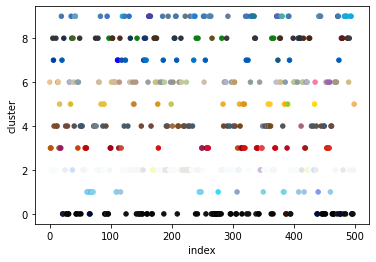

In [9]:
# take a look at distribution of colors - only the first 500 for clarity

df_colors[:500].reset_index(drop=False).plot(x='index', y='cluster', kind='scatter', color=colors[:500])

---
### Exercise 3: Establish some human-readable names for your clusters like red, blue, yellow, etc. (4 points)

##### Student Solution

In [10]:
# name your clusters

color_dict = {
    0:'Black', 
    1:'Light blue', 
    2:'White', 
    3:'Red',
    4:'Medium earthy colors',
    5:'Tan',
    6:'Light earthy colors',    
    7:'Dark blue',
    8:'Dark earthy colors', 
    9:'Medium blue'    
}

color_dict

{0: 'Black',
 1: 'Light blue',
 2: 'White',
 3: 'Red',
 4: 'Medium earthy colors',
 5: 'Tan',
 6: 'Light earthy colors',
 7: 'Dark blue',
 8: 'Dark earthy colors',
 9: 'Medium blue'}

---
### Exercise 4: Determine the centroids of the clusters (4 points)


##### Student Solution

In [11]:
# get centroids

centroids = model.cluster_centers_

centroids

array([[ 13.74260355,  12.25739645,  16.14201183],
       [117.68181818, 203.02272727, 228.02272727],
       [244.11278195, 246.61904762, 246.12531328],
       [192.65562914,  29.58940397,  38.8013245 ],
       [105.6961326 ,  88.13259669,  85.56353591],
       [224.60504202, 181.31092437,  42.06722689],
       [184.58606557, 176.51229508, 159.07377049],
       [  5.40869565,  84.85217391, 195.19130435],
       [ 47.96517413,  65.42288557,  46.38308458],
       [ 58.28865979, 131.82989691, 179.89690722]])

---
### Exercise 5: Write a function that makes the best guess of an RGB triple based on the centroids (4 points)

The  [`KMeans.predict()`](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.predict) function predicts the cluster of any test data point by returning the cluster whose center is closest to the test data point.

Without using `predict()` write a function that guesses the color of an RBG triple by finding the nearest centroid.

There are many ways to calculate distance.  For this exercise it is sufficient to use a simple Euclidean distance formula.


##### Student Solution

In [12]:
## Define a color guessing function

def guess_color(centroids, color_dict, test_color):

  # Make a list of the Euclidean distance between the test_color and each centroid
  distances = []
    
  for c in range( len(centroids) ):
    distances.append( np.linalg.norm(centroids[c] - test_color) )

  # Get index of the centroid with the smallest Euclidean distance   
  index = min( range( len(distances) ), key=distances.__getitem__ )  

  # Get the color of the index
  color_name = color_dict[index]    
  return color_name


In [13]:
# Predict color of an RGB value based on the Euclidean distance to the centroids

color1 = [200, 5, 5]  # approximately red 

print(guess_color(centroids=centroids, color_dict=color_dict, test_color=color1))

Red


---
### Exercise 6: Write a function that returns the colors name based on the `predict()` function (4 points)


In [14]:
def predict_color(model, color_dict, test_color):

  # Get index of the predicted the class
  index = model.predict( [test_color] )[0]

  # Get the color of the index
  color_name = color_dict[index]    
  return color_name


In [15]:
# Predict color of an RGB value based on the predict function of the model created above

color1 = [200, 5, 5] # approximately red 
print(predict_color(model=model, color_dict=color_dict, test_color=color1))

Red


---
### Exercise 7: Explainability - make some visual output to show that your guesses worked (4 points)

It is very important in data sceince, when possible, to have a "visual confirmation" that our code is working.  Think of this as an explainability exercise where you need to vefiry that your code it working.

Use `matplotlib` to make some visual out to verify that `color1` is indeed RED.

Here is an example, but anything that shows the color in a programmatic way is fine.

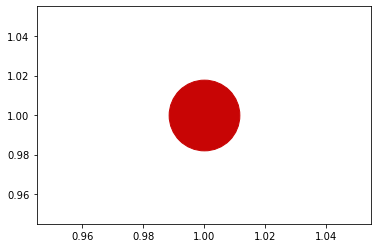




In [16]:
def show_color(test_color, color_name):

  plt.rcParams["figure.figsize"] = [3, 3]
  plt.rcParams["figure.autolayout"] = True
  fig = plt.figure()
  ax = fig.add_subplot()
  rgb_new = ( np.array(test_color)/255 ).tolist()
  circle1 = patches.Circle((0.2, 0.2), radius=0.5, color=rgb_new)
  ax.add_patch(circle1)
  ax.axis('equal')

  print("Is this ", color_name, "?")
  plt.show()


Is this  Red ?


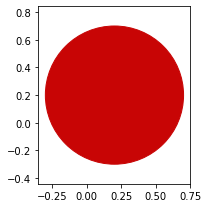

In [17]:
# Test the function created above

color1 = [200, 5, 5] # approximately red 

color1_name = guess_color(centroids=centroids, color_dict=color_dict, test_color=color1)

show_color(color1, color1_name)

---
### Exercise 8: Check a range of colors (4 points)
 
Given the list of `test_colors`, predict the colors using your `guess_color` function

Comment on how good the guesses are.  Are there any unexcepted results? 

Yes, some of the results are unexpected. Some of the purple colors were predicted as "blue", a light blue and light pink color were predicted as "white", and some darker pink colors were predicted as "light earthy colors". This is probably because we only have 10 clusters, so some colors that are different to the human eye have been included in the same cluster. Also, maybe I could have done a better job naming the clusters (but it was difficult to name clusters that included a wide range of colors).


In [18]:
## generate test colors

def make_test_colors(n=3):
    
    test_colors = list()
    
    for rr in range(n+1):
        
        for gg in range(n+1):
            
            for bb in range(n+1):  
                
              red = int(rr/n*255)
              green = int(gg/n*255)
              blue = int(bb/n*255)

            color = [red, green, blue]
            
            test_colors.append(color)
            
    test_colors = np.array(test_colors)
    
    return test_colors

[0, 0, 255]
Is this  Dark blue ?


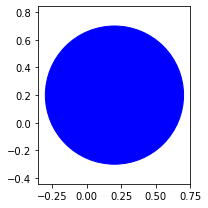

[0, 85, 255]
Is this  Dark blue ?


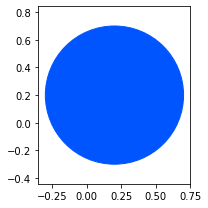

[0, 170, 255]
Is this  Medium blue ?


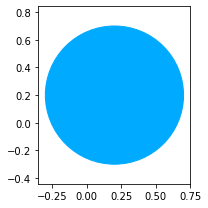

[0, 255, 255]
Is this  Light blue ?


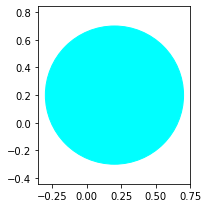

[85, 0, 255]
Is this  Dark blue ?


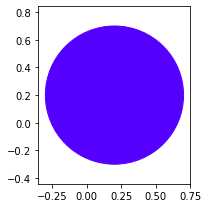

[85, 85, 255]
Is this  Medium blue ?


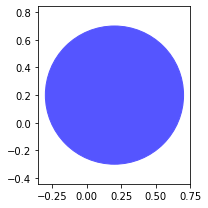

[85, 170, 255]
Is this  Light blue ?


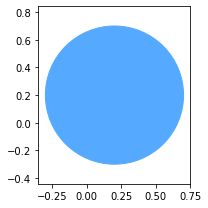

[85, 255, 255]
Is this  Light blue ?


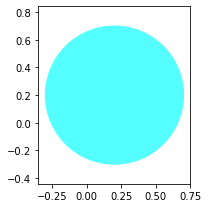

[170, 0, 255]
Is this  Medium blue ?


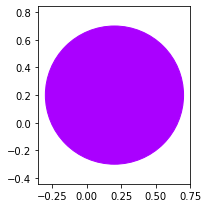

[170, 85, 255]
Is this  Light blue ?


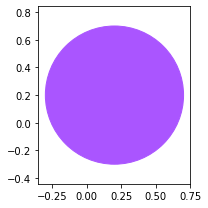

[170, 170, 255]
Is this  Light blue ?


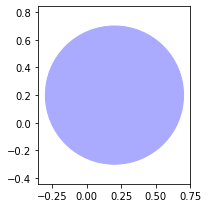

[170, 255, 255]
Is this  White ?


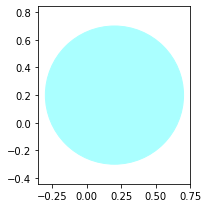

[255, 0, 255]
Is this  Light earthy colors ?


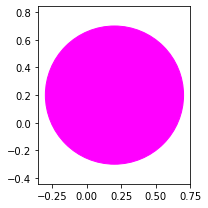

[255, 85, 255]
Is this  Light earthy colors ?


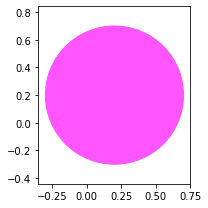

[255, 170, 255]
Is this  White ?


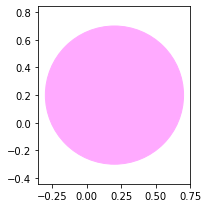

[255, 255, 255]
Is this  White ?


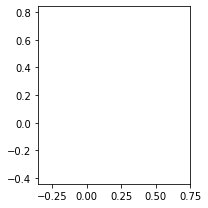

In [19]:
# Test the function created above

test_colors = make_test_colors()

for ii,cc in enumerate(test_colors):

  print( list(cc) )

  color_name = guess_color(centroids=centroids, color_dict=color_dict, test_color=cc)

  show_color(cc, color_name)
